<a href="https://colab.research.google.com/github/timothy777-ux/Salary-prediction-using-ml/blob/main/mlmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING MODEL FOR MSA**

 ML MODEL ON calculating salary using experience

In [ ]:
import pandas as pd
df=pd.read_csv('Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


## data prep

In [ ]:

y = df['Salary']
x = df[['YearsExperience']]

### data split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

In [ ]:
x_test

,YearsExperience
9,3.8
26,9.6
28,10.4
13,4.2
5,3.0
12,4.1


##**model building**

###linear regression

#### training the model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### applying the model

In [ ]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([116686.78246579, 111070.1126316 ,  54903.41428967,  76433.98198741,
       100772.88460224,  64264.53067999,  47414.52117741, 125111.78721708,
        37117.29314805,  38989.51642612,  82050.6518216 ,  68945.08887515,
        82986.76346063,  93283.99148998,  40861.73970418,  90475.65657289,
        63328.41904096,  74561.75870934,  72689.53543128, 103581.21951934,
        56775.63756773,  45542.29789934, 108261.7777145 ,  56775.63756773])

In [ ]:
y_train

,Salary
27,112636.0
25,105583.0
6,60151.0
17,83089.0
22,101303.0
11,55795.0
4,39892.0
29,121873.0
0,39344.0
1,46206.0


#### model performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
Lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
Lr_train_r2score=r2_score(y_train,y_lr_train_pred)
Lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
Lr_test_r2score=r2_score(y_test,y_lr_test_pred)
Lr_results=pd.DataFrame(['liner regression model',Lr_train_mse,Lr_train_r2score,Lr_test_mse,Lr_test_r2score]).transpose()
Lr_results.columns=['method','training mse','training r2score','testing mse','testing r2score']
import joblib
filename = 'salaryndexperience.joblib'
joblib.dump(lr, filename)

['salaryndexperience.joblib']

### results

In [ ]:
Lr_results

,method,training mse,training r2score,testing mse,testing r2score
0,liner regression model,33430977.967556,0.951403,24477109.089656,0.972073


## Visualization

[]

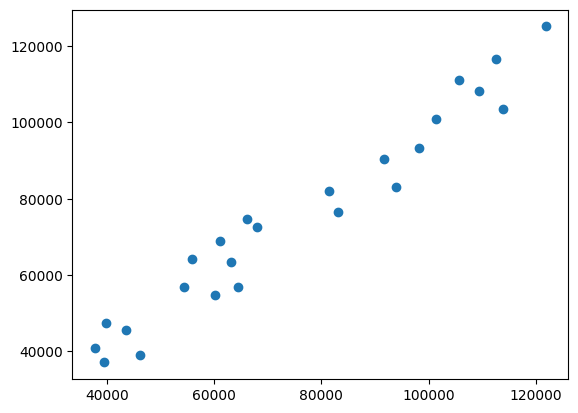

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train,y=y_lr_train_pred)
plt.plot()

### EXAMPLE

In [ ]:

years_to_predict = [[1.5], [5.5], [10.0]]

loaded_model = joblib.load('salaryndexperience.joblib')

predicted_salaries = loaded_model.predict(years_to_predict)

print("Predicted Salaries:")
for years, salary in zip(years_to_predict, predicted_salaries):
    print(f"Years of Experience: {years[0]}, Predicted Salary: {salary:.2f}")

Predicted Salaries:
Years of Experience: 1.5, Predicted Salary: 39925.63
Years of Experience: 5.5, Predicted Salary: 77370.09
Years of Experience: 10.0, Predicted Salary: 119495.12


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
